# Sales Prediction
## ( Simple Linear Regression)

### Problem Statement

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.We have to Build a model which predicts sales based on the money spent on different platforms for marketing.

### Data

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

## Reading and Understanding the Data

In [81]:


import warnings
warnings.filterwarnings('ignore')



import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [82]:
advertising = pd.read_csv(r"C:\Users\HP\Desktop\advertising.csv",engine='python')

In [83]:
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [84]:
advertising=advertising.drop("Unnamed: 0",axis=1)

In [85]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Inspection

In [86]:
advertising.shape

(200, 4)

In [87]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [88]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [89]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

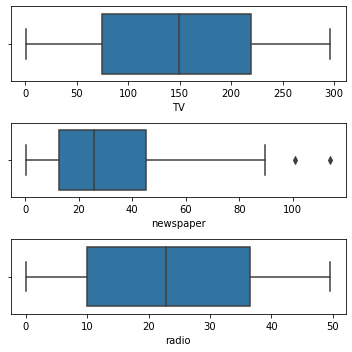

In [90]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['radio'], ax = axs[2])
plt.tight_layout()

In [91]:
# There are no considerable outliers present in the data.

## Exploratory Data Analysis

#### Sales (Target Variable)

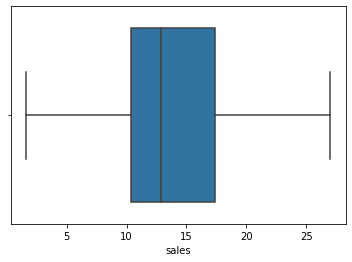

In [92]:
sns.boxplot(advertising['sales'])
plt.show()

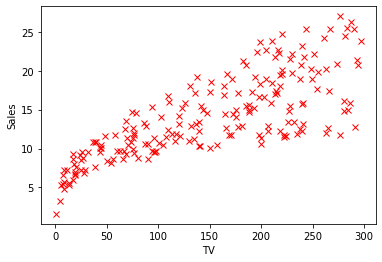

In [157]:
plt.figure()
plt.plot(advertising['TV'], advertising['sales'], 'rx')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

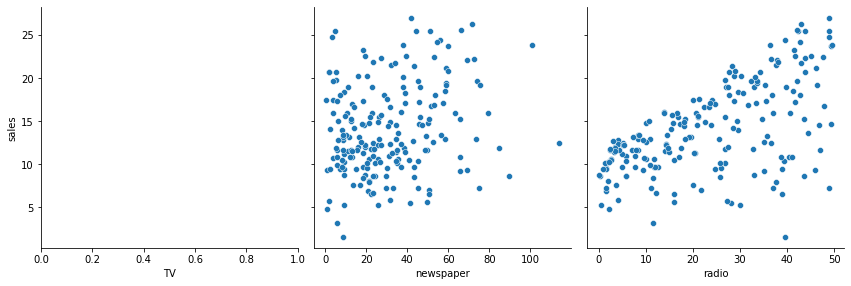

In [160]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV','newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

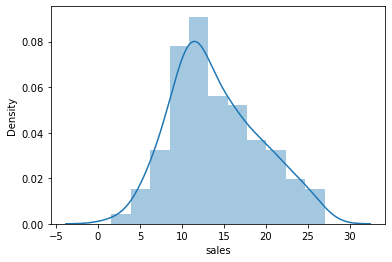

In [116]:
sns.distplot(advertising['sales'])

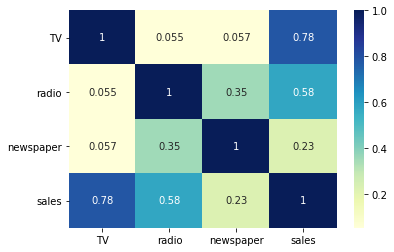

In [117]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

## Model Building

### Performing Simple Linear Regression

### Steps in model building using `statsmodels`


In [118]:
X = advertising['TV']
y = advertising['sales']

#### Train-Test Split


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [120]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [121]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [122]:
import statsmodels.api as sm

In [123]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [124]:
# Print the parameters, 
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [125]:
# Performing a summary operation 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sat, 08 May 2021   Prob (F-statistic):           2.84e-30
Time:                        14:27:34   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value


##### 2. R - squared is 0.62
Meaning that 62% of the variance in `Sales` is explained by `TV`


###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant

 Let's visualize how well the model fit the data.

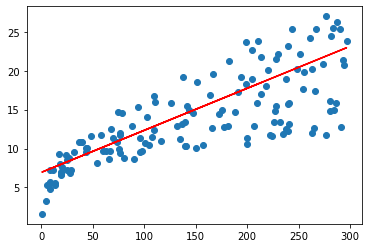

In [126]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Model Evaluation

### Residual analysis 


#### Distribution of the error terms
We need to check if the error terms are also normally distributed , let us plot the histogram of the error terms and see what it looks like.

In [127]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

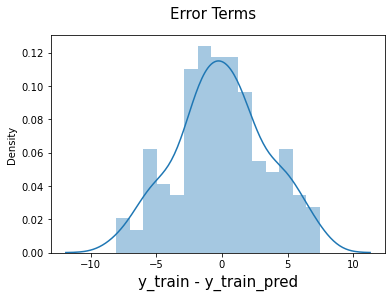

In [128]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0.

#### Looking for patterns in the residuals

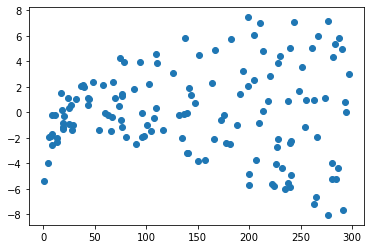

In [129]:
plt.scatter(X_train,res)
plt.show()

As you can see, the regression line is a pretty good fit to the data

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data.

In [130]:

X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [131]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [132]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [133]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.824145628832701

###### Checking the R-squared on the test set

In [134]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.59429872677833

##### Visualizing the fit on the test set

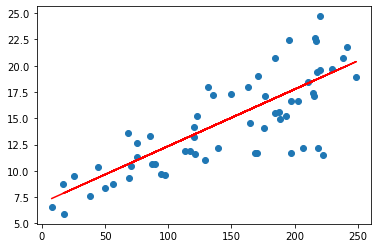

In [113]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

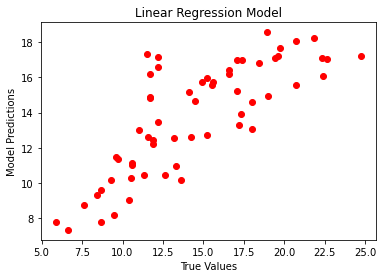

In [149]:
plt.scatter(y_test, y_pred, color='r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('Linear Regression Model')
plt.show()

In [150]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))

In [151]:
RMSE

2.824

In [152]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [153]:
print('RMSE: ', RMSE, '\nMSE: ', MSE, '\nMAE: ', MAE, '\nMAPE: ', MAPE,'%')


RMSE:  2.824 
MSE:  7.975798532854853 
MAE:  2.1619849326720724 
MAPE:  14.875874931647132 %
